# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

# 5강

## 1. Matplotlib 시작하기

- 파이썬의 데이터 시각화 라이브러리

cf) 라이브러리 vs 프레임워크  
라이브러리 : 개발자들이 만들었을 뿐, 우리가 원하는 목표를 달성하기 위해서는 라이브러리 안의 코드들을 조합해서 결과를 내야한다.(numpy 등)  
프레임워크 : 이미 틀이 짜여 있고, 우리는 그 틀에서 내용을 채워가며 결과물을 완성한다.(장고, 플라스크 등)  

- matplotlib
matplotlib를 설치한다.  
```
pip3 install matplotlib
```
jupyternotebook에서, matplotlib로 시각화된 결과를 노트북 창에서 확인하도록 하기 위해서는 다음과 같은 특수한 키워드를 적어준다.  
- `%matplotlib inline`을 통해서 활성화!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Case Study with Arguments

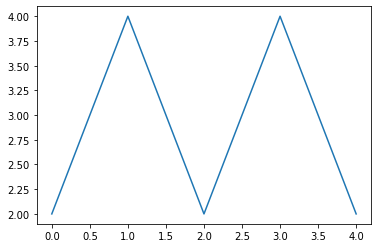

In [9]:
plt.plot([2, 4, 2, 4, 2]) # 실제 plotting을 하는 함수 # y = x + 1
plt.show() # plt를 확인하는 명령

### Figsize : Figure(도면)의 크기를 선언

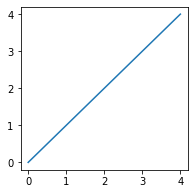

In [16]:
plt.figure(figsize=(3, 3)) # 3*3 사이즈의 plotting을 할 도면을 선언

plt.plot([0, 1, 2, 3, 4]) # 실제 plotting을 하는 함수 # y = x + 1
plt.show() # plt를 확인하는 명령

## 2차함수 그래프 with plot()

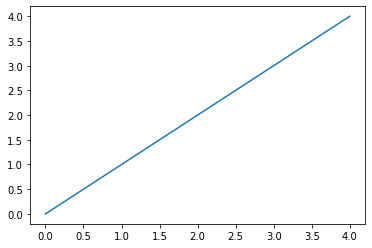

In [18]:
# 리스트를 이용해서 1차함수 y=x를 그려보면:

plt.plot([0, 1, 2, 3, 4]) # figure가 지정이 되지 않아 그래프 사이즈가 위와 좀 다르다.
plt.show()

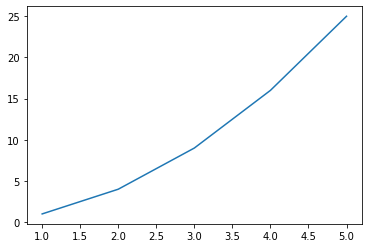

In [19]:
# numpy.array를 이용해서 함수 그래프 그리기
# y=x^2
x = np.array([1, 2, 3, 4, 5]) # 정의역
y = np.array([1, 4, 9, 16, 25]) # f(x)
plt.plot(x, y)
# 찍은 점이 5개밖에 없어서 곡선이 매끄럽지 못하다.

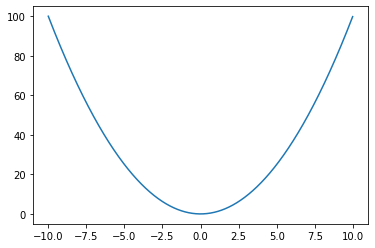

In [22]:
# 찍은 점을 무수히 많게 해서 매끄러운 곡선을 만들 것이다.
# np.arange(a, b, c) : a에서 b까지 c만큼 증가하는 범위를 만든다. c:0.01을 주어 무수히 많은 점을 만들 것이다.

x = np.arange(-10, 10, 0.01)
plt.plot(x, x**2)
plt.show()

# 우리가 익히 잘 알고 있는 2차함수의 곡선이 그려진다!

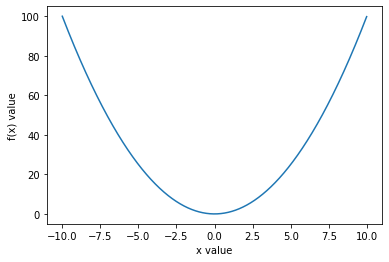

In [23]:
# x, y축에 설명 추가하기

x = np.arange(-10, 10, 0.01)
### 추가된 부분
plt.xlabel("x value")
plt.ylabel("f(x) value")
###
plt.plot(x, x**2)
plt.show()

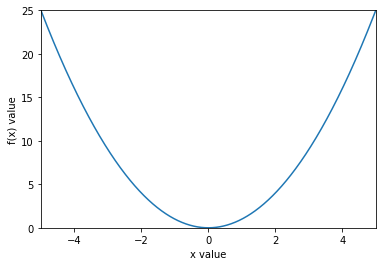

In [24]:
# x, y축의 범위를 설정하기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
### 추가된 부분
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
###
plt.plot(x, x**2)
plt.show()

# axis로 설정한 범위 안의 그래프만 출력되는 것을 볼 수 있다.

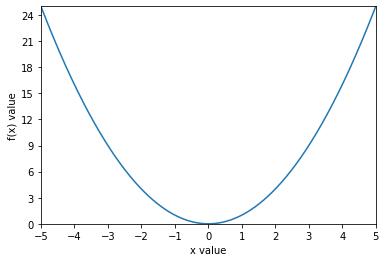

In [27]:
# x, y축에 눈금 설정하기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
### 추가된 부분
# tick은 눈금을 의미한다. list comprehension을 사용할 수 있다.
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정, -5, -4, -4, ...
plt.yticks([i for i in range(0, 27, 3)]) # y축의 눈금 설정
###
plt.plot(x, x**2)
plt.show()

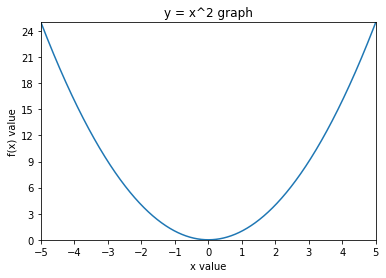

In [28]:
# 그래프에 title 달기
x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정, -5, -4, -4, ...
plt.yticks([i for i in range(0, 27, 3)]) # y축의 눈금 설정
### 추가된 부분
plt.title("y = x^2 graph")
###
plt.plot(x, x**2)
plt.show()

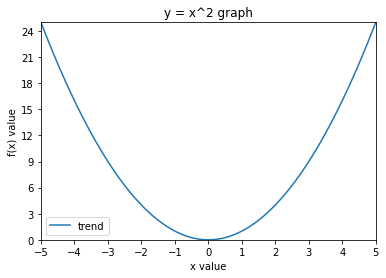

In [29]:
# 범례를 달기
x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # x축의 눈금 설정, -5, -4, -4, ...
plt.yticks([i for i in range(0, 27, 3)]) # y축의 눈금 설정
plt.title("y = x^2 graph")
### 추가된 부분
plt.plot(x, x**2, label="trend") # 파란색 선이 "trend"라는 범례라고 설정
plt.legend()
###
plt.show()

# 6강

## 3. Matplotlib Case Study
### 꺾은선 그래프(Plot)
- `.plot()`

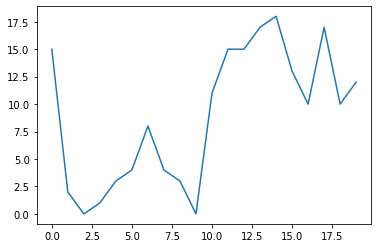

In [41]:
# plot을 이용해 꺾은선 그래프를 만들 수 있다.
x = np.arange(20) # 0~19
y = np.random.randint(0, 20, 20) # 0부터 20까지의 수 중에서 난수를 20번 생성

plt.plot(x, y) # 랜덤 난수이기 때문에 꺾은선 그래프의 추세를 확인할 수는 없다.

plt.show()
# Extra : y축을 20까지 보이게 하고싶다면?, y축을 "5"단위로 보이게 하고 싶다면?
# .axis(), .yticks()

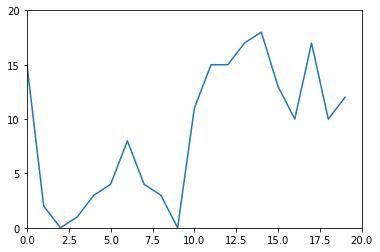

In [43]:
# y축을 20까지 보이게 하고싶다면?
plt.plot(x, y)

plt.axis([0, 20, 0, 20])
plt.yticks([0, 5, 10, 15, 20])
plt.show()

### 산점도(Scatter Plot)
- `.scatter()`  
꺾은선 그래프는 시계열 데이터에서 많이 사용한다.  
시계열 데이터 : x축이 시간, y축이 그에 대한 변수  
산점도는 x와 y가 완전히 별개의 변수일때 많이 사용한다.  

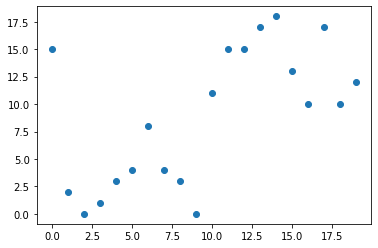

In [44]:
# scatter를 이용해 산점도를 만들 수 있다.
plt.scatter(x, y)
plt.show()

## 박스 그림(Box Plot)
- 수치형 데이터에 대한 정보(사분위수에서 Q1(25%), Q2(50%), Q3(75%), min, max)

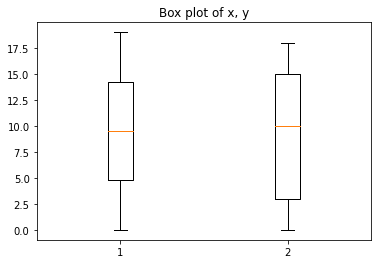

In [53]:
plt.boxplot((x, y))
# plt.boxplot(x)
# plt.boxplot(y)

# T자 처럼 생긴 상한선과 하한선이 변수 y의 single min, max 값을 보여준다. 
# 가로선이 총 3가지인데, 맨 아래의 가로선은 Q1(백분위에서 25%)
# 가운데의 주황색 선은 Q2(중앙값, 백분위에서 50%)
# 마지막 선은 Q3(백분위에서 75%)

# Extra : Plot의 title을 "Box plot of x, y"라고 지정해보자.
plt.title("Box plot of x, y")
plt.show()

### 막대 그래프(Bar Plot)
- 범주형 데이터의 "값"과 그 값의 크기를 직사각형으로 나타낸 그림
- `.bar()`

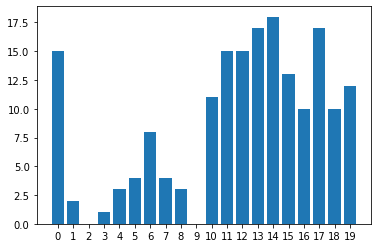

In [59]:
plt.bar(x, y)
# Extra : xticks를 올바르게 처리해봅시다.
plt.xticks(np.arange(0, 20, 1)) #x의 범위를 0부터 20까지 1간격으로
plt.show()

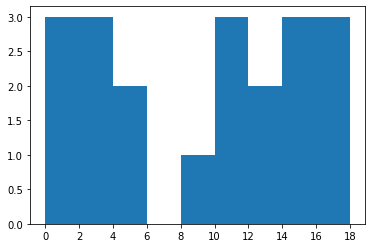

In [58]:
# cf) Histogram
# .hist()
# 도수분포를 직사각형의 막대 형태로 나타냈다. 
# 막대그래프는 x축에 각 변량들이 있는데, 히스토그램은 여러 변량을 그룹으로 묶는다.
# 여러 변량을 그룹으로 묶은 것이 "계급"
# "계급"으로 나타낸 것이 특징 : 0, 1, 2가 아니라 0~2까지의 "범주형"데이터로 구성 후 그림을 그림

plt.hist(y, bins=np.arange(0, 20, 2)) # 0부터 20까지 2개씩 범주로 묶기
plt.xticks(np.arange(0, 20, 2)) # Extra : xticks를 올바르게 처리해봅시다.
plt.show()

### 원형 그래프(Pie Chart)
- 데이터에서 전체에 대한 부분의 비율을 부채꼴로 나타낸 그래프
- 다른 그래프에 비해서 **비율** 확인에 용이
- `.pie()`

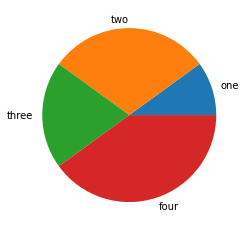

In [62]:
z = [100, 300, 200, 400] # 데이터

plt.pie(z, labels=['one', 'two', 'three', 'four']) # 파이차트는 무조건 데이터와 대응되는 라벨을 붙여줄 것!!
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

### Matplotlib를 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리
- 커널밀도그림
- 카운트그림
- 캣그림
- 스트립그림
- 히트맵

### Seaborn Import 하기

In [63]:
!pip3 install seaborn

     |████████████████████████████████| 283 kB 501 kB/s eta 0:00:01
     |████████████████████████████████| 29.1 MB 4.1 MB/s eta 0:00:01


In [64]:
import seaborn as sns

### 커널밀도그림(Kernel Density Plot)
- 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림
- `sns.kdeplot()`

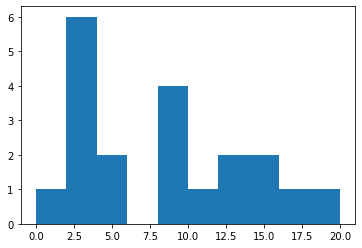

In [66]:
# in Histogram 히스토그램 복습!

x = np.arange(0, 22, 2) # 간격을 정해주기
y = np.random.randint(0, 20, 20) # 0~20까지의 수 중에서 20번 샘플링

plt.hist(y, bins=x)
plt.show()

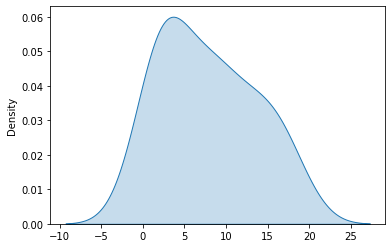

In [68]:
# kdeplot
# 스무스한 곡선이 그려진다.
# y 값은 도수이고, kdeplot의 density는 전체를 1이라고 봤을때 어느 정도의 density를 갖는지 보여준다.

sns.kdeplot(y, shade=True) # False로 하면 색칠이 없어짐

plt.show()

### 카운트그림(Count Plot)
- 범주형 column의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과
- `sns.countplot()`

In [69]:
vote_df = pd.DataFrame({"name":['Andy', 'Bob', 'Cat'], "vote":[True, True, False]})

vote_df
# 이제 True와 False의 빈도를 시각화해볼 것이다.

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [70]:
# in matplotlib barplot

vote_count = vote_df.groupby('vote').count()

vote_count

,name
vote,
False,1
True,2


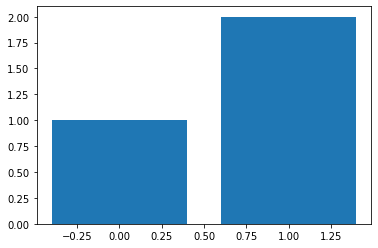

In [72]:
plt.bar(x=[False,True], height=vote_count['name'])

plt.show()

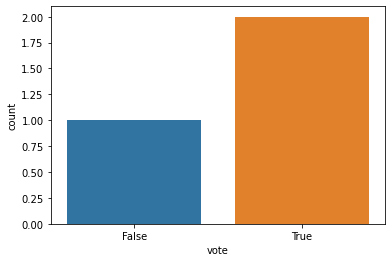

In [74]:
# sns의 countplot
# 이제 seaborn으로 그려보자! 시각적으로 더 보기 좋다.

sns.countplot(x=vote_df["vote"])
plt.show()

### 캣그림(Cat Plot)
- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수
- `sns.catplot()`

In [75]:
covid = pd.read_csv("./archive/country_wise_latest.csv")

covid.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


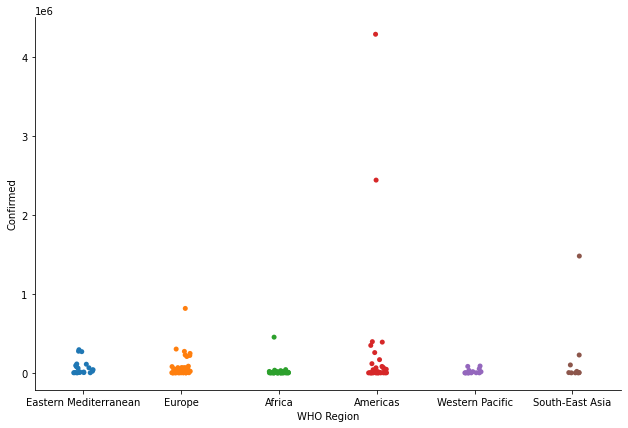

In [82]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid, kind='strip') # kind = 'strip', 'violin', ... 그래프의 형태를 바꿀 수 있다!
s.fig.set_size_inches(10, 6) # 그래프의 사이즈를 지정해서 보기 편하게~
plt.show()
# Region 별 확진자 수를 볼 수 있다.
# 범주형 데이터와 수치형 데이터를 매핑하는데 좋은 효과!

### 스트립그림(Strip Plot)
- scatter plot과 유사하게 데이터의 수치를 표현하는 그래프
- `sns.stripplot()`

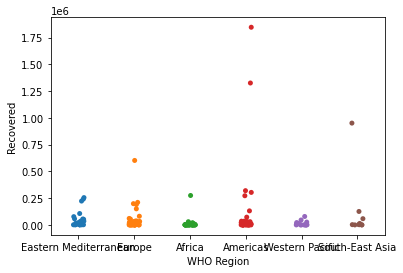

In [84]:
s = sns.stripplot(x='WHO Region', y='Recovered', data=covid)

plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

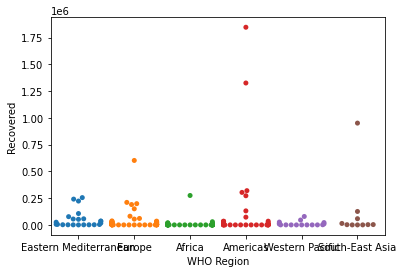

In [85]:
# cf) swarmplot
# 유사한 점들이 겹치는 경우, 양 옆으로 분산해서 한눈에 해당하는 값들이 얼마나 있는지 확인하기 쉽다.

s = sns.swarmplot(x='WHO Region', y='Recovered', data=covid)

plt.show()
# 오류 발생하는 이유는, 점들의 값이 너무 크다보니 주어진 데이터를 다 표현할 수 없다는 워닝이라 일단은 무시해도 됨!

### 히트맵(Heatmap)
- 데이터의 행렬을 색상으로 표현해주는 그래프
- `sns.heatmap()`
- 가장 많이 사용하는 예시가 바로 상관계수!

In [86]:
# 히트맵 예제
covid.corr() # covid 데이터의 상관계수

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


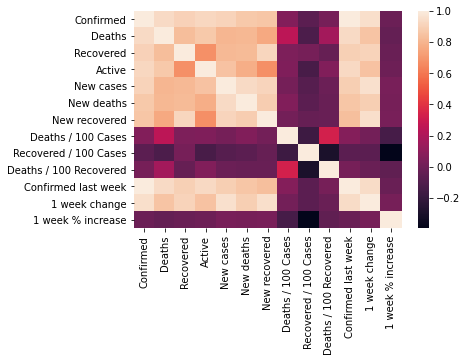

In [88]:
sns.heatmap(covid.corr()) # 위의 행렬을 히트맵으로 색을 통해 표현!
plt.show()
# 밝은 색은 양의 상관관계(1에 가까움)를, 어두운 색은 관련이 없음(0에 가까움)를 나타낸다.

## Mission:

### 